## ROC and AUC

**ROC** (Receiver operating characteristic) curve illustrates the diagnostic ability of a binary classifier as its threshold is varied. **AUC** (Area under curve) is the measure used to compare two **ROC** curves. **ROC** curve is a plot of *True positive rate* vs *False positive rate* for various values of threshold.

These concepts are best understood in terms of the **Confusion matrix**. **Confusion matrix** is a square matrix that reports the counts of **true positives (TP)**, **true negatives (TN)**, **false positives (FP)** and **false negatives (FN)**.

| | Predicted Positive | Predicted Negative|
|--|--|--|
|**Actual Positive** | True Positives (TP) | False Negatives (FN) |
|**Actual Negative** | False Positive (FP) | True Negative (TN) |

Now lets define two things **ERR** (Error) and **ACC** (Accuracy). 

$ERR = \frac{FN + FP}{TP+FN+FP+TN}$ and $ACC=\frac{TP+TN}{TP+FN+FP+TN}$, note $ACC = 1- ERR$.

Lets define now two more variables $Precision = \frac{TP}{TP+FP}$ and $Recall = \frac{TP}{TP+FN}$

A classifier can be such that its very precise and makes a true prediction when its very very sure, such a classifier can have a large number of False Negative cases, but will have very few False Positive cases. Such a classifier is called with high precision and low recall.

There are two more similar metrics **True Positive Rate (TPR)**, $TPR =\frac{TP}{TP+FN}$ , **TPR** is same as **Recall**. **False Positive Rate (FPR)**, $FPR=\frac{FP}{FP+TN}$.

Many times $Precision$ and $Recall$ are joined in one metric called $F1$ score. 

$F1 = 2\frac{\text{Precision } \times \text{ Recall }}{\text{Precision } + \text{ Recall }}$

**Type 1 error** is determined by number of **false positives (FP)**, and **Type 2 error** is determined by number of **false negatives (FN)**.

Now lets look at some of these concepts in action using Logistic regression and SKlearn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [2]:
#import iris dataset
from sklearn import datasets

iris = datasets.load_iris()
#load only one features
X = iris.data[:,[1]]
y = iris.target
y = y[(iris.target==0) | (iris.target==1)]
X = X[(iris.target==0) | (iris.target==1)]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_test:', np.bincount(y_test))
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y: [50 50]
Labels counts in y_test: [15 15]
Labels counts in y_train: [35 35]


In [3]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [4]:
#Lets fit logistic regression to this using sklearm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='none')
lr.fit(X_train_std, y_train)
decision_test = lr.decision_function(X_test_std)
y_pred_test = lr.predict(X_test_std)
y_pred_train = lr.predict(X_train_std)

Confusion Matrix = [[11  4]
 [ 3 12]]
Accuracy = 0.77
Error = 0.23
Precision = 0.75
Recall = 0.8
F1 = 0.77
TPR = 0.8
FPR = 0.27


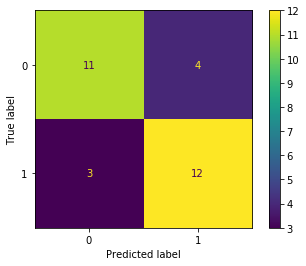

In [5]:
#Get the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix =", confusion_matrix_test)
plot_confusion_matrix(lr, X_test_std, y_test) 

TN = confusion_matrix_test[0,0]
TP = confusion_matrix_test[1,1]
FP = confusion_matrix_test[0,1]
FN = confusion_matrix_test[1,0]

#Accuracy score 
accuracy = (TP + TN)/(TP + TN + FP + FN)
print(f"Accuracy = {accuracy:.2}")

error = (FP + FN)/(TP + TN + FP + FN)
print(f"Error = {error:.2}")

#Precision
precision = (TP / (TP + FP))
print(f"Precision = {precision:.2}")

#Recall
recall = (TP / (TP + FN))
print(f"Recall = {recall:.2}")

#F1 score
f1 = 2 * recall * precision / ( recall + precision )
print(f"F1 = {f1:.2}")

#True Positive Rate
TPR = (TP /(TP + FN))
print(f"TPR = {TPR:.2}")

#Flass positive rate
fpr = ( FP / (FP + TN))
print(f"FPR = {fpr:.2}")

#Now lets use sklearn to compute these things

Accuracy = 0.77
Precision = 0.75
Recall = 0.8
F1 Score = 0.77
AUC = 0.9


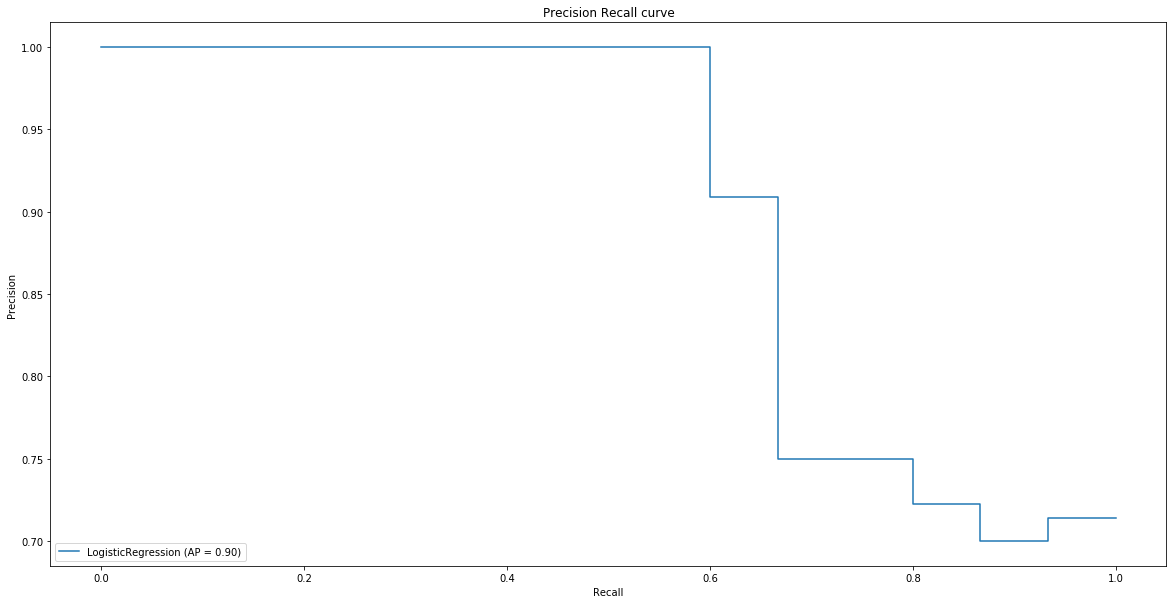

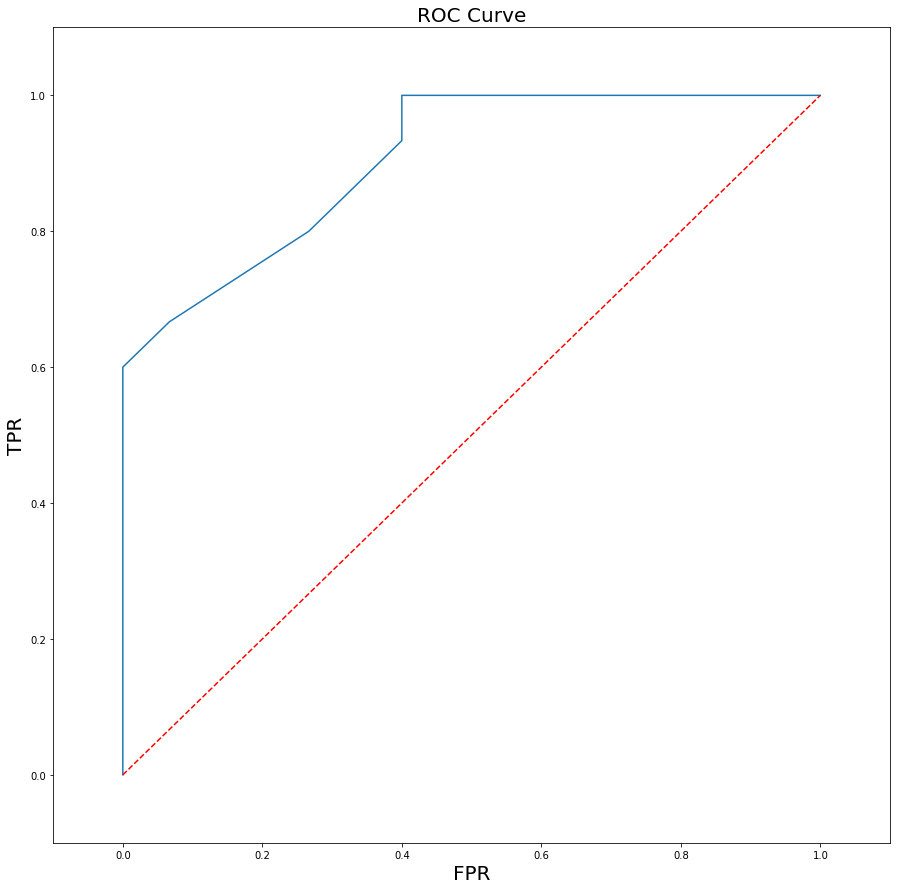

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

print(f"Accuracy = {accuracy_score(y_test, y_pred_test):.2}")
print(f"Precision = {precision_score(y_test, y_pred_test):.2}")
print(f"Recall = {recall_score(y_test, y_pred_test):.2}")
print(f"F1 Score = {f1_score(y_test, y_pred_test):.2}")

#Lets plot precision_recall and roc curve

disp = plot_precision_recall_curve(lr, X_test_std, y_test)
disp.ax_.set_title('Precision Recall curve')
disp.figure_.set_figheight(10)
disp.figure_.set_figwidth(20)

#now lets plot the roc curve
fpr, tpr, thresholds = roc_curve(y_test, decision_test)
plt.figure(figsize=(15,15))
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1],[0,1], 'r--')
plt.title('ROC Curve', fontsize=20)
plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])

#Finally lets compute AUC
print(f"AUC = {auc(fpr,tpr):.2}")